In [1]:
import pandas as pd
import os, sys
import glob

In [2]:
output_dir = "/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
sample_raw = "2024-06-19-H5WKTAFX7/PoolAresort01"


In [4]:
# Parameters
sample_raw = "2024-06-19-H5WKTAFX7/PoolCresort01"


In [5]:
parent_folder = "/g/korbel/WORKFLOW_RESULTS"


In [6]:
manual_drop = None


In [7]:
#sample_raw = "LANSDORP/HGSVCxPool1LANDSDORP"
#parent_folder = "/scratch/tweber/DATA/MC_DATA"
#manual_drop = "HGSVCxPool1"

In [8]:


l_samples = [
# "2021-07-29-HWYJ2AFX2/HGSVCxpool1x01",
# "2021-08-03-H22VWAFX3/HGSVCxpool2x02",
# "2021-08-03-H22VWAFX3/HGSVCxpool3x01",
# "2023-11-09-HW5NFAFX5/HGSVCpool1NEW",
# "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW",
# "2024-01-29-H33YJAFX7/LanexHGSVCpool2NEW96wellUVLED"
#"2024-01-30-AACT75KM5/HGSVCpool1NEWp2"
 #"2024-01-30-AACT75KM5/HGSVCpool3NEWp2"
  sample_raw  
]

sample = l_samples[0].split("/")[-1]
sample_for_savedir = l_samples[0].replace("/", "--")
sample_for_savedir_lite = sample_for_savedir.split("--")[1]

print(sample_for_savedir)

#l_samples = [
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-07-29-HWYJ2AFX2/HGSVCxpool1x01"
#"2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"
#"2023-11-09-HW5NFAFX5/HGSVCpool1NEW"
#"2021-05-12-HMCNFAFX2/GM18989x01",
#"2021-04-21-HMNJLAFX2/GM19320x01",
#"2021-05-12-HMCNFAFX2/GM19331x01",
#"2021-05-31-HNLFLAFX2/GM19836x01",
#"2021-05-31-HNLFLAFX2/GM20355x01",
#"2021-05-06-HN2VJAFX2/GM21487x01",
#"2021-04-21-HMNJLAFX2/HG02282x03",
#"2021-05-06-HN2VJAFX2/HG02554x01",
#"2021-05-31-HNLFLAFX2/HG02666x02",
#"2021-04-21-HMNJLAFX2/HG02769x01",
#"2021-05-06-HN2VJAFX2/HG02953x01",
#"2021-05-12-HMCNFAFX2/HG03452x02",
#]

#year = list(set([e.split("-")[0] for e in l_samples]))[0]
#index = "PE20" if year == "2021" or year == "2022" else "iTRU"
os.makedirs(f"{output_dir}/{sample_for_savedir}", exist_ok=True)

2024-06-19-H5WKTAFX7--PoolCresort01


In [9]:
# Glob pattern to find .vcf files for the given sample
vcf_files = glob.glob(f"/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf")

# Initialize the index variable
index = None

# Check if the list of files is not empty
if vcf_files:
    # Retrieve the first file in the list
    first_file = vcf_files[0]
    
    # Check if "PE20" or "iTRU" is in the filename of the first file
    if "PE20" in first_file:
        index = "PE20"
    elif "iTRU" in first_file:
        index = "iTRU"
    else:
        index = ""

# Print the index value or a message if no index was found
if index:
    print(f"Index found: {index}")
else:
    print("No PE20 or iTRU index found in the first file.")

Index found: iTRU


In [10]:
ref_path = f"/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/{sample}/merge.txt.gz"
#ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/HGSVCxpool3x01/merge.txt.gz"
# ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/PSEUDOPOOL/merge.txt.gz"
ref = pd.read_csv(ref_path, compression="gzip", sep="\t",)
ref["GlobalSample"] = ref_path.split("/")[-2]

if "with_sanity_check" in output_dir:

    sanity_check_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/Random_for_sanity_check/merge.txt.gz"
    sanity_check_ref = pd.read_csv(sanity_check_path, compression="gzip", sep="\t")
    sanity_check_ref["GlobalSample"] = sanity_check_path.split("/")[-2]

    ref = pd.concat([ref, sanity_check_ref])

ref["ID"] = "chr" + ref["ID"]
ref

,ID,AC,AF,SAMPLE,GlobalSample
0,chr10:48883:G:A,4,0.000625,HG00128,PoolCresort01
1,chr10:49904:C:T,97,0.015147,HG00128,PoolCresort01
2,chr10:51933:T:C,4,0.000625,HG00128,PoolCresort01
3,chr10:82758:G:A,3,0.000468,HG00128,PoolCresort01
4,chr10:87303:G:A,95,0.014835,HG00128,PoolCresort01
...,...,...,...,...,...
15854716,chrX:155973672:G:A,211,0.032948,NA19723,PoolCresort01
15854717,chrX:155989331:G:A,3,0.000468,NA19723,PoolCresort01
15854718,chrX:155991848:G:A,95,0.014835,NA19723,PoolCresort01
15854719,chrX:156009266:T:G,278,0.043410,NA19723,PoolCresort01


In [11]:
ref['unique_sample_count'] = ref.groupby('ID')['SAMPLE'].transform('nunique')
ref = ref[ref['unique_sample_count'] == 1]
#ref

In [12]:
ref

,ID,AC,AF,SAMPLE,GlobalSample,unique_sample_count
0,chr10:48883:G:A,4,0.000625,HG00128,PoolCresort01,1
2,chr10:51933:T:C,4,0.000625,HG00128,PoolCresort01,1
3,chr10:82758:G:A,3,0.000468,HG00128,PoolCresort01,1
4,chr10:87303:G:A,95,0.014835,HG00128,PoolCresort01,1
5,chr10:115097:G:T,4,0.000625,HG00128,PoolCresort01,1
...,...,...,...,...,...,...
15854712,chrX:155931145:A:G,2,0.000312,NA19723,PoolCresort01,1
15854713,chrX:155932517:A:G,27,0.004216,NA19723,PoolCresort01,1
15854714,chrX:155950046:G:A,26,0.004060,NA19723,PoolCresort01,1
15854717,chrX:155989331:G:A,3,0.000468,NA19723,PoolCresort01,1


In [13]:
ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count()


GlobalSample   SAMPLE 
PoolCresort01  HG00128     88933
               HG00148     83958
               HG00271     90895
               HG00452     96055
               HG00619     90522
               HG01054    104737
               HG01058    116612
               HG01119     95470
               HG01131     97352
               HG01356    100027
               HG01577     91596
               HG01805     90526
               HG01866     82797
               HG01890    255616
               HG01990    256243
               HG02013    276745
               HG02284    232642
               HG02496    253271
               HG02521     94774
               HG02562    280064
               HG02703    283083
               HG02943    290269
               HG03111    285530
               HG03258    266803
               HG03548    313313
               HG03593     97655
               HG03604    100008
               HG03709    116430
               HG03729    105667
               HG037

In [14]:
ref_count = ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count().reset_index()
ref_count.to_csv(f"{output_dir}/{sample_for_savedir}/reference_file_SNP_counts.tsv", sep="\t")
ref_count.head()


,GlobalSample,SAMPLE,ID
0,PoolCresort01,HG00128,88933
1,PoolCresort01,HG00148,83958
2,PoolCresort01,HG00271,90895
3,PoolCresort01,HG00452,96055
4,PoolCresort01,HG00619,90522


In [15]:
#sanity_check_ref.SAMPLE.unique()
#manual_drop = "HGSVCpool2iTRUE5"


In [16]:
import glob
final_vcf = list()
from tqdm.notebook import tqdm

for vcf_input in glob.glob(f"/g/korbel2/weber/MosaiCatcher_files/DEMULTIPLEXING_POOLS/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf"):
    if index:
        cell_line = vcf_input.split("/")[-1].split("_")[0].replace(".vcf", "")
    else:
        cell_line = vcf_input.split("/")[-1].replace(".vcf", "")
        
#    print(cell_line)
#    break
    vcf = pd.read_csv(vcf_input, skiprows=255, sep="\t")
#    print(vcf.head())

    vcf["cell_line"] = cell_line
#    print(vcf)
    vcf["ID"] = vcf["#CHROM"] + ":" + vcf["POS"].astype(str) + ":" + vcf["REF"]+ ":"  + vcf["ALT"]
#    print(vcf_input)
#    print(cell_line.split(f"{index}")[0])
    if manual_drop:
        vcf = vcf.drop([manual_drop], axis=1)
    else:
        vcf = vcf.drop([cell_line.split(f"{index}")[0]], axis=1)
#    vcf = vcf.drop(["HGSVCpool2iTRUE5"], axis=1)

#    print(vcf)
    final_vcf.append(vcf)
final_vcf = pd.concat(final_vcf)
final_vcf.to_csv(f"{output_dir}/{sample_for_savedir}/full_set_of_SNPs_called.tsv.gz", sep="\t", compression="gzip")

final_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line
0,chr1,49327147,chr1:49327147:CAGC:TAGG,CAGC,TAGG,4.435520e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X2M1X;DP...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01
1,chr1,95417911,chr1:95417911:G:T,G,T,5.633690e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01
2,chr2,28171593,chr2:28171593:T:C,T,C,5.633690e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01
3,chr2,32916241,chr2:32916241:T:G,T,G,2.316260e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=9;CIGAR=1X;DP=9;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01
4,chr2,32916282,chr2:32916282:G:T,G,T,4.168920e-07,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=13;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01
...,...,...,...,...,...,...,...,...,...,...
5105,chrUn_GL000216v2,173963,chrUn_GL000216v2:173963:G:T,G,T,2.420710e-07,.,AB=0.210526;ABP=16.8392;AC=1;AF=0.5;AN=2;AO=4;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96
5106,chrUn_GL000216v2,173975,chrUn_GL000216v2:173975:G:C,G,C,5.256260e-11,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=19;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96
5107,chrUn_GL000216v2,173991,chrUn_GL000216v2:173991:C:T,C,T,6.734660e-08,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=16;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96
5108,chrUn_GL000216v2,174005,chrUn_GL000216v2:174005:C:T,C,T,1.284370e-05,.,AB=0.153846;ABP=16.5402;AC=1;AF=0.5;AN=2;AO=2;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96


In [17]:
final_vcf['unique_sample_count'] = final_vcf.groupby('ID')['cell_line'].transform('nunique')
#final_vcf = final_vcf[final_vcf['unique_sample_count'] == 1]
final_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count
0,chr1,49327147,chr1:49327147:CAGC:TAGG,CAGC,TAGG,4.435520e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X2M1X;DP...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01,1
1,chr1,95417911,chr1:95417911:G:T,G,T,5.633690e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01,1
2,chr2,28171593,chr2:28171593:T:C,T,C,5.633690e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01,1
3,chr2,32916241,chr2:32916241:T:G,T,G,2.316260e+01,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=9;CIGAR=1X;DP=9;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01,89
4,chr2,32916282,chr2:32916282:G:T,G,T,4.168920e-07,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=13;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C01,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,chrUn_GL000216v2,173963,chrUn_GL000216v2:173963:G:T,G,T,2.420710e-07,.,AB=0.210526;ABP=16.8392;AC=1;AF=0.5;AN=2;AO=4;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96,10
5106,chrUn_GL000216v2,173975,chrUn_GL000216v2:173975:G:C,G,C,5.256260e-11,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=19;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96,2
5107,chrUn_GL000216v2,173991,chrUn_GL000216v2:173991:C:T,C,T,6.734660e-08,.,AB=0;ABP=0;AC=0;AF=0;AN=2;AO=2;CIGAR=1X;DP=16;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96,2
5108,chrUn_GL000216v2,174005,chrUn_GL000216v2:174005:C:T,C,T,1.284370e-05,.,AB=0.153846;ABP=16.5402;AC=1;AF=0.5;AN=2;AO=2;...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C96,1


In [18]:
final_vcf.cell_line.nunique()

96

In [19]:
merge_df = pd.merge(final_vcf, ref, on="ID", how="inner")
merge_df.to_csv(f"{output_dir}/{sample_for_savedir}/join_ref_to_SNPs_called.tsv.gz", sep="\t", compression="gzip")
merge_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count_x,AC,AF,SAMPLE,GlobalSample,unique_sample_count_y
0,chr13,74522031,chr13:74522031:A:T,A,T,52.538600,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C02,1,69,0.010774,HG02521,PoolCresort01,1
1,chr1,154500306,chr1:154500306:C:G,C,G,48.748500,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C03,1,138,0.021549,HG00452,PoolCresort01,1
2,chr2,47431925,chr2:47431925:C:A,C,A,15.261100,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C03,1,46,0.007183,HG02943,PoolCresort01,1
3,chr3,186907219,chr3:186907219:G:A,G,A,55.211700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C03,1,34,0.005309,HG01131,PoolCresort01,1
4,chr7,58033212,chr7:58033212:G:A,G,A,0.606899,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,PoolCresort01iTRU3C03,1,36,0.005621,HG03709,PoolCresort01,1


In [20]:
merge_df.cell_line.nunique()

79

In [21]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
mosaicatcher_stats = pd.concat([pd.read_csv("{}/{}/counts/{}.info_raw".format(parent_folder, sample, sample.split("/")[-1]), sep="\t", skiprows=13) for sample in l_samples])
mosaicatcher_stats["cell"] = mosaicatcher_stats["cell"].str.replace(".sort.mdup.bam", "")
mosaicatcher_stats.head()

,sample,cell,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,PoolCresort01,PoolCresort01iTRU3C01,0,9527,29,8492,525,264,217,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
1,PoolCresort01,PoolCresort01iTRU3C02,2,929429,304,804028,34856,44914,45327,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
2,PoolCresort01,PoolCresort01iTRU3C03,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
3,PoolCresort01,PoolCresort01iTRU3C04,3,1695232,551,1511256,54505,64008,64912,1,0.377477,2.71366,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
4,PoolCresort01,PoolCresort01iTRU3C05,4,2058999,802,1842820,68933,72798,73646,1,0.377477,3.07940,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...


In [22]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
ashleys_labels = pd.concat([pd.read_csv(f"{parent_folder}/{sample}/cell_selection/labels.tsv", sep="\t") for sample in l_samples])
ashleys_labels["cell"] = ashleys_labels["cell"].str.replace(".sort.mdup.bam", "")
ashleys_labels.head()

,cell,prediction,probability,sample
0,PoolCresort01iTRU3C01,0,0.0000,PoolCresort01
1,PoolCresort01iTRU3C02,0,0.1057,PoolCresort01
2,PoolCresort01iTRU3C03,1,0.9365,PoolCresort01
3,PoolCresort01iTRU3C04,1,0.6644,PoolCresort01
4,PoolCresort01iTRU3C05,1,0.8709,PoolCresort01


In [23]:
combine_ashleys_mc_stats = pd.merge(ashleys_labels, mosaicatcher_stats, on=["cell"], how="inner")
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample_x,sample_y,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,PoolCresort01iTRU3C01,0,0.0000,PoolCresort01,PoolCresort01,0,9527,29,8492,525,264,217,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
1,PoolCresort01iTRU3C02,0,0.1057,PoolCresort01,PoolCresort01,2,929429,304,804028,34856,44914,45327,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
2,PoolCresort01iTRU3C03,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
3,PoolCresort01iTRU3C04,1,0.6644,PoolCresort01,PoolCresort01,3,1695232,551,1511256,54505,64008,64912,1,0.377477,2.71366,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
4,PoolCresort01iTRU3C05,1,0.8709,PoolCresort01,PoolCresort01,4,2058999,802,1842820,68933,72798,73646,1,0.377477,3.07940,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...


In [24]:
#gb_sample_count_stats

In [25]:
combine_ashleys_mc_stats

,cell,prediction,probability,sample_x,sample_y,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,PoolCresort01iTRU3C01,0,0.0000,PoolCresort01,PoolCresort01,0,9527,29,8492,525,264,217,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
1,PoolCresort01iTRU3C02,0,0.1057,PoolCresort01,PoolCresort01,2,929429,304,804028,34856,44914,45327,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
2,PoolCresort01iTRU3C03,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
3,PoolCresort01iTRU3C04,1,0.6644,PoolCresort01,PoolCresort01,3,1695232,551,1511256,54505,64008,64912,1,0.377477,2.71366,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
4,PoolCresort01iTRU3C05,1,0.8709,PoolCresort01,PoolCresort01,4,2058999,802,1842820,68933,72798,73646,1,0.377477,3.07940,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
5,PoolCresort01iTRU3C06,0,0.0775,PoolCresort01,PoolCresort01,3,1745217,839,1564236,54017,62594,63531,1,0.377477,2.65551,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
6,PoolCresort01iTRU3C07,0,0.0000,PoolCresort01,PoolCresort01,0,27428,13,24612,976,924,903,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
7,PoolCresort01iTRU3C08,0,0.1685,PoolCresort01,PoolCresort01,3,1615403,516,1445675,47079,60718,61415,1,0.377477,2.56998,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
8,PoolCresort01iTRU3C09,0,0.1525,PoolCresort01,PoolCresort01,3,1422354,430,1260956,44598,57813,58557,1,0.377477,2.44784,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
9,PoolCresort01iTRU3C10,1,0.9571,PoolCresort01,PoolCresort01,6,2118590,604,1829250,92661,97494,98581,1,0.377477,4.11848,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...


In [26]:
#pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")

In [27]:
gb_sample_count = merge_df.rename({"cell_line": "cell"}, axis=1).groupby(["cell", "GlobalSample", "SAMPLE"])["ID"].count().reset_index()
gb_sample_count_stats = gb_sample_count.rename(columns={"cell_line": "cell"})
gb_sample_count_stats = pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")
gb_sample_count_stats = gb_sample_count_stats.loc[gb_sample_count_stats["prediction"] == 1]
if index:
    gb_sample_count_stats["cell"] = gb_sample_count_stats["cell"].apply(lambda r: r.split(index)[1])
gb_sample_count_stats.to_csv(f"{output_dir}/{sample_for_savedir}/groupby_sample_counts_with_stats.tsv.gz", sep="\t", compression="gzip")
gb_sample_count_stats.head()

,cell,GlobalSample,SAMPLE,ID,prediction,probability,sample_x,sample_y,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
1,3C03,PoolCresort01,HG00452,2,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
2,3C03,PoolCresort01,HG01131,2,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
3,3C03,PoolCresort01,HG01577,1,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
4,3C03,PoolCresort01,HG01805,2,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
5,3C03,PoolCresort01,HG02943,1,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...


In [28]:
combine_ashleys_mc_stats.prediction.value_counts().sum()

96

In [29]:
gb_sample_count_stats.cell.nunique()

24

In [30]:
gb_sample_count_stats.cell.nunique()

24

In [31]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table_stats = pd.pivot_table(gb_sample_count_stats, columns=["GlobalSample", "SAMPLE"], index="cell", values="ID").fillna(0)
import scipy.stats as stats
pivot_table_stats_zscore = pivot_table_stats.apply(lambda x: stats.zscore(x), axis=1)
pivot_table_stats_zscore.to_csv(f"{output_dir}/{sample_for_savedir}/pivot_table_zscore_norm.tsv.gz", sep="\t", compression="gzip")
#pivot_table_stats_zscore.index = [e.split(index)[1] for e in pivot_table_stats_zscore.index]
pivot_table_stats_zscore.head()

GlobalSample PoolCresort01                                                    \
SAMPLE             HG00128   HG00148   HG00271   HG00452   HG00619   HG01054   
cell                                                                           
3C03             -0.443678 -0.443678 -0.443678  2.928276 -0.443678 -0.443678   
3C05             -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10             -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13             -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18             -0.710047 -0.710047  0.516398 -0.710047 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         HG01058   HG01119   HG01131   HG01356   HG01577   HG01805   
cell                                                                       
3C03         -0.443678 -0.443678  2.928276 -0.443678  1.242299  2.928276   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  2.335130   
3C13         -0.252217 -0.252217 -0.252217  1.664630 -0.252217 -0.252217   
3C18         -0.710047 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         HG01866   HG01890   HG01990   HG02013   HG02284   HG02496   
cell                                                                       
3C03         -0.443678 -0.443678 -0.443678 -0.443678 -0.443678 -0.443678   
3C05          3.415650 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13          1.664630 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18         -0.710047  1.742843  2.969287 -0.710047  1.742843  0.516398   

GlobalSample                                                              \
SAMPLE         HG02521   HG02562   HG02703   HG02943   HG03111   HG03258   
cell                                                                       
3C03         -0.443678 -0.443678 -0.443678  1.242299 -0.443678 -0.443678   
3C05         -0.292770  3.415650 -0.292770 -0.292770  3.415650 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  4.944980   
3C13         -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18          0.516398  0.516398  1.742843  0.516398  0.516398 -0.710047   

GlobalSample                                                              \
SAMPLE         HG03548   HG03604   HG03709   HG03729   HG03797   HG03928   
cell                                                                       
3C03         -0.443678 -0.443678  1.242299 -0.443678 -0.443678 -0.443678   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  2.335130   
3C13         -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18          1.742843 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         NA10843   NA18553   NA18632   NA18853   NA18946   NA19675   
cell                                                                       
3C03         -0.443678 -0.443678  1.242299 -0.443678 -0.443678 -0.443678   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13         -0.252217 -0.252217 -0.252217 -0.252217  5.498323 -0.252217   
3C18         -0.710047 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                      
SAMPLE         NA19711   NA19723  
cell                              
3C03         -0.443678 -0.443678  
3C05         -0.292770 -0.292770  
3C10         -0.274721 -0.274721  
3C13         -0.252217 -0.252217  
3C18          1.742843 -0.710047

<Axes: xlabel='GlobalSample-SAMPLE', ylabel='cell'>

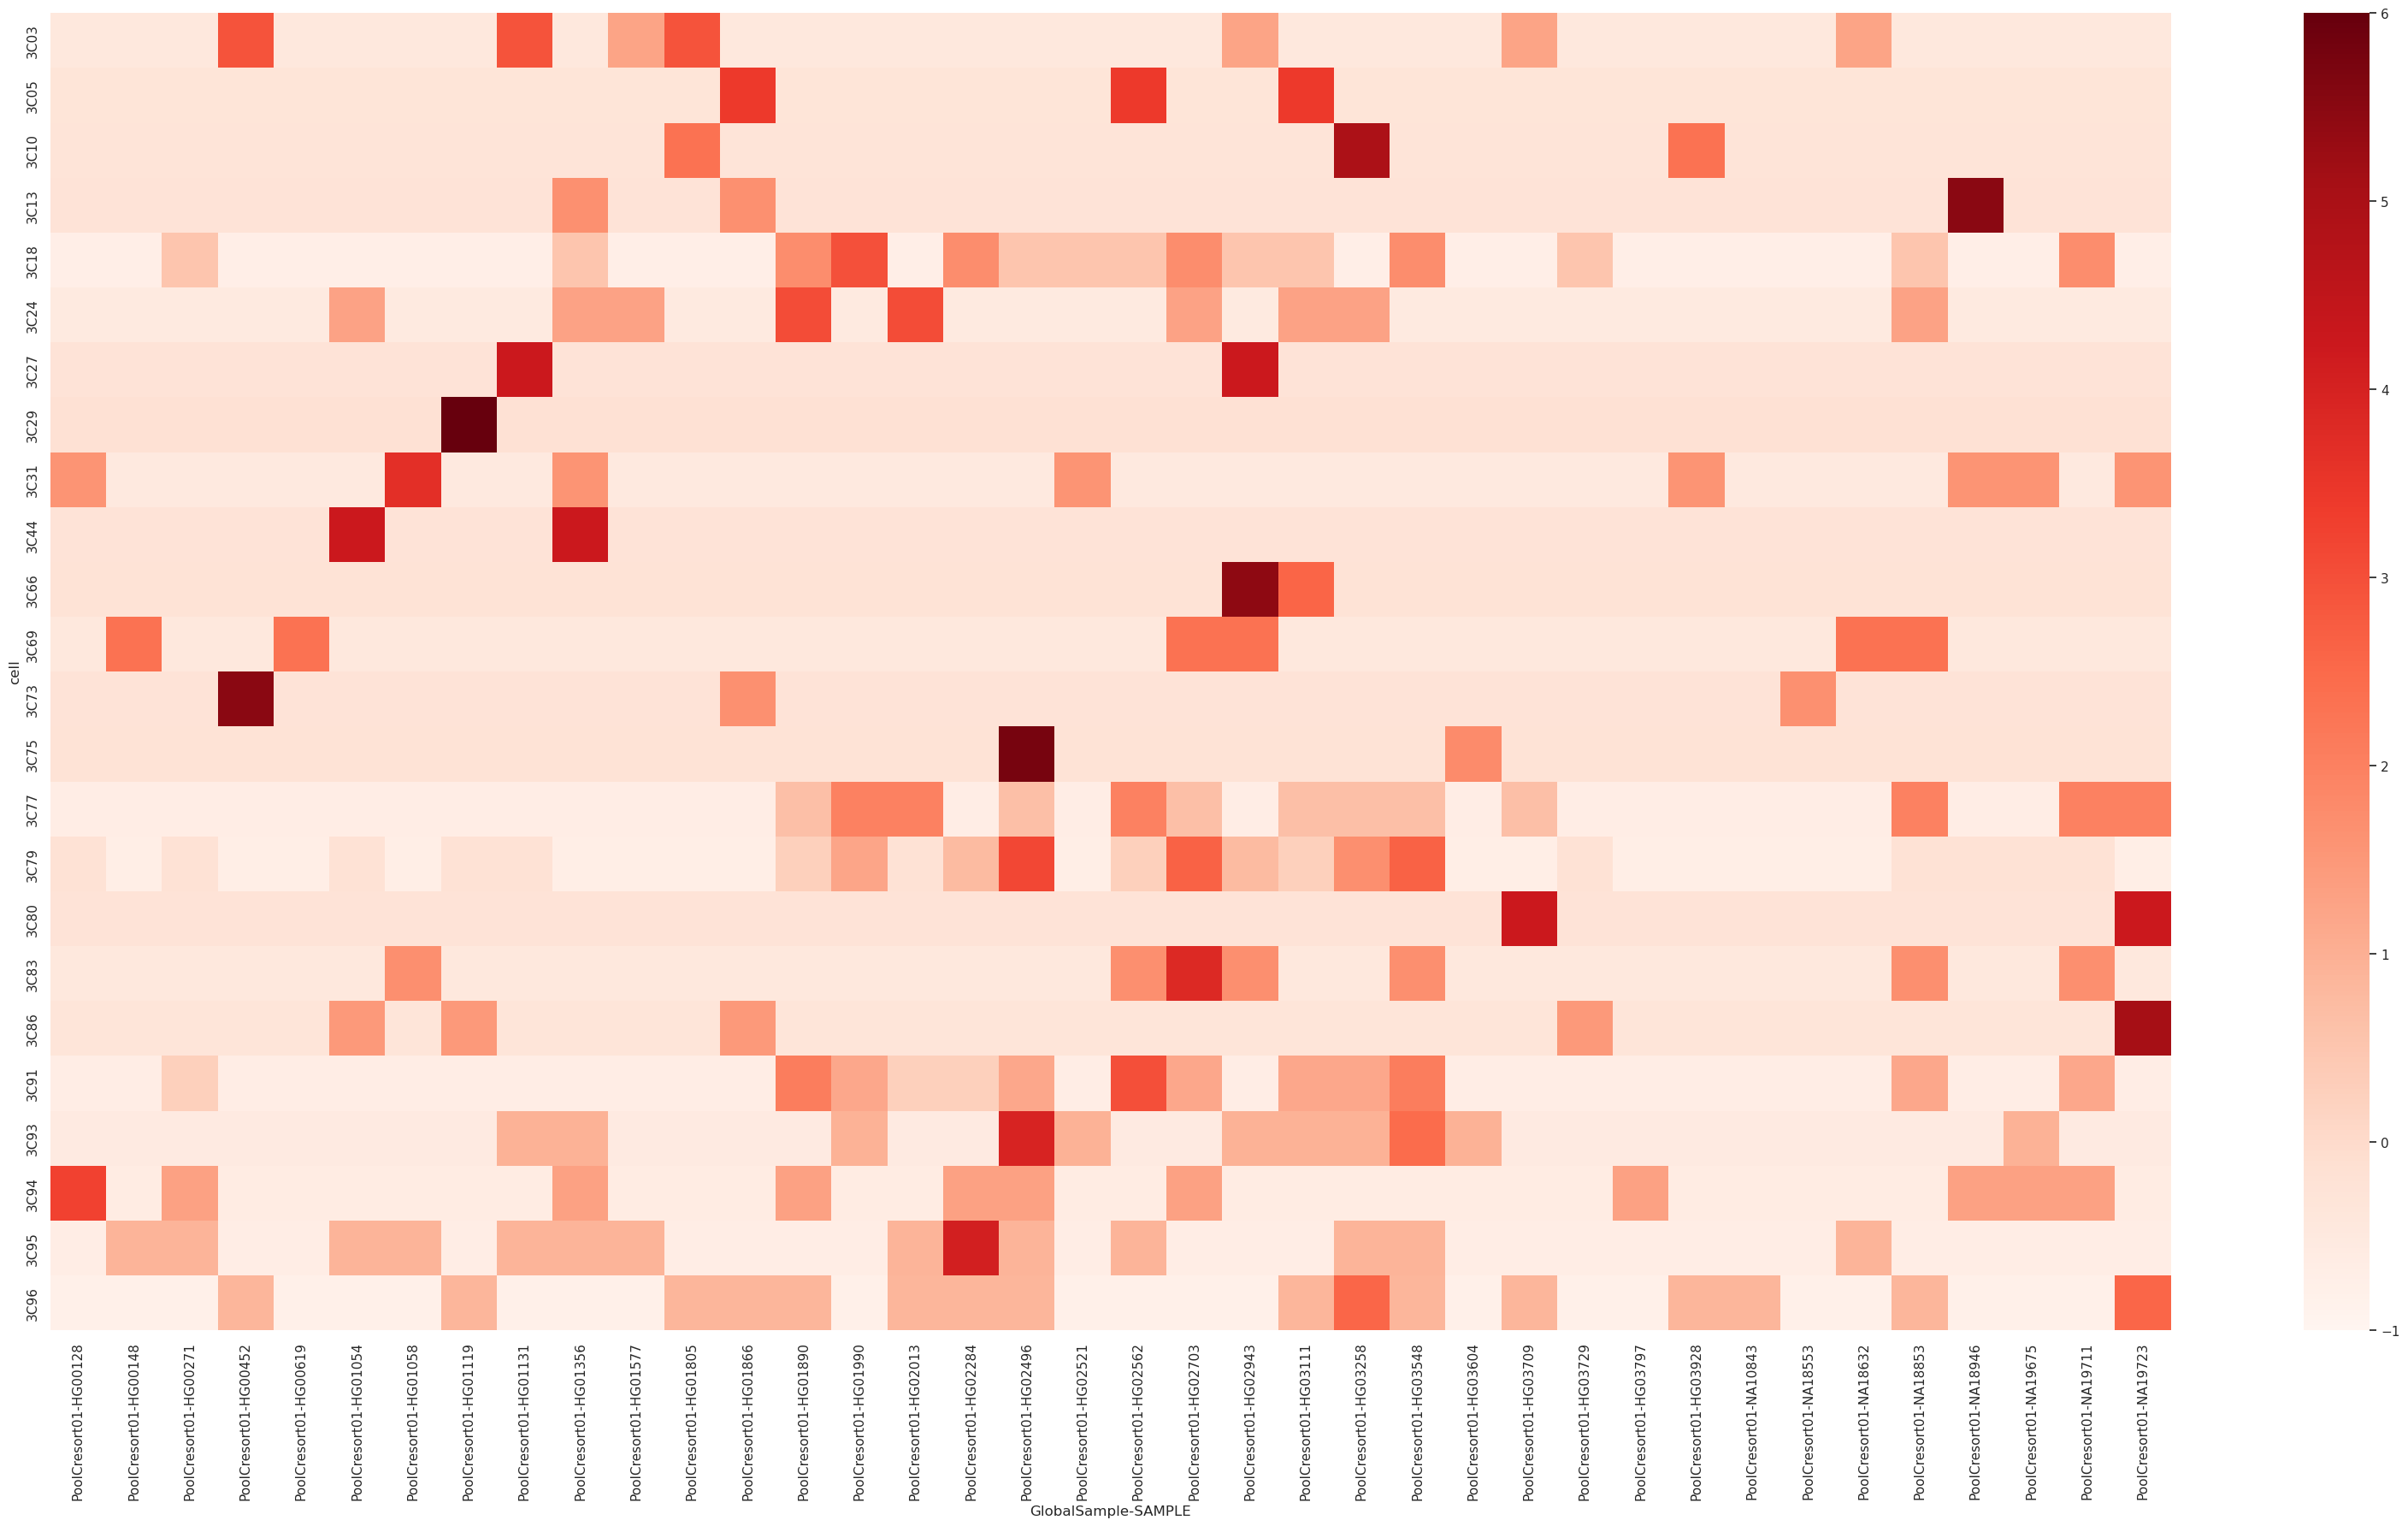

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.heatmap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)
#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/heatmap_zscore_cell_per_sample.png")
ax

[Text(0.5, 0, 'PoolCresort01-HG00128'), Text(1.5, 0, 'PoolCresort01-HG00148'), Text(2.5, 0, 'PoolCresort01-HG00271'), Text(3.5, 0, 'PoolCresort01-HG00452'), Text(4.5, 0, 'PoolCresort01-HG00619'), Text(5.5, 0, 'PoolCresort01-HG01054'), Text(6.5, 0, 'PoolCresort01-HG01058'), Text(7.5, 0, 'PoolCresort01-HG01119'), Text(8.5, 0, 'PoolCresort01-HG01131'), Text(9.5, 0, 'PoolCresort01-HG01356'), Text(10.5, 0, 'PoolCresort01-HG01577'), Text(11.5, 0, 'PoolCresort01-HG01805'), Text(12.5, 0, 'PoolCresort01-HG01866'), Text(13.5, 0, 'PoolCresort01-HG01890'), Text(14.5, 0, 'PoolCresort01-HG01990'), Text(15.5, 0, 'PoolCresort01-HG02013'), Text(16.5, 0, 'PoolCresort01-HG02284'), Text(17.5, 0, 'PoolCresort01-HG02496'), Text(18.5, 0, 'PoolCresort01-HG02521'), Text(19.5, 0, 'PoolCresort01-HG02562'), Text(20.5, 0, 'PoolCresort01-HG02703'), Text(21.5, 0, 'PoolCresort01-HG02943'), Text(22.5, 0, 'PoolCresort01-HG03111'), Text(23.5, 0, 'PoolCresort01-HG03258'), Text(24.5, 0, 'PoolCresort01-HG03548'), Text(25.5

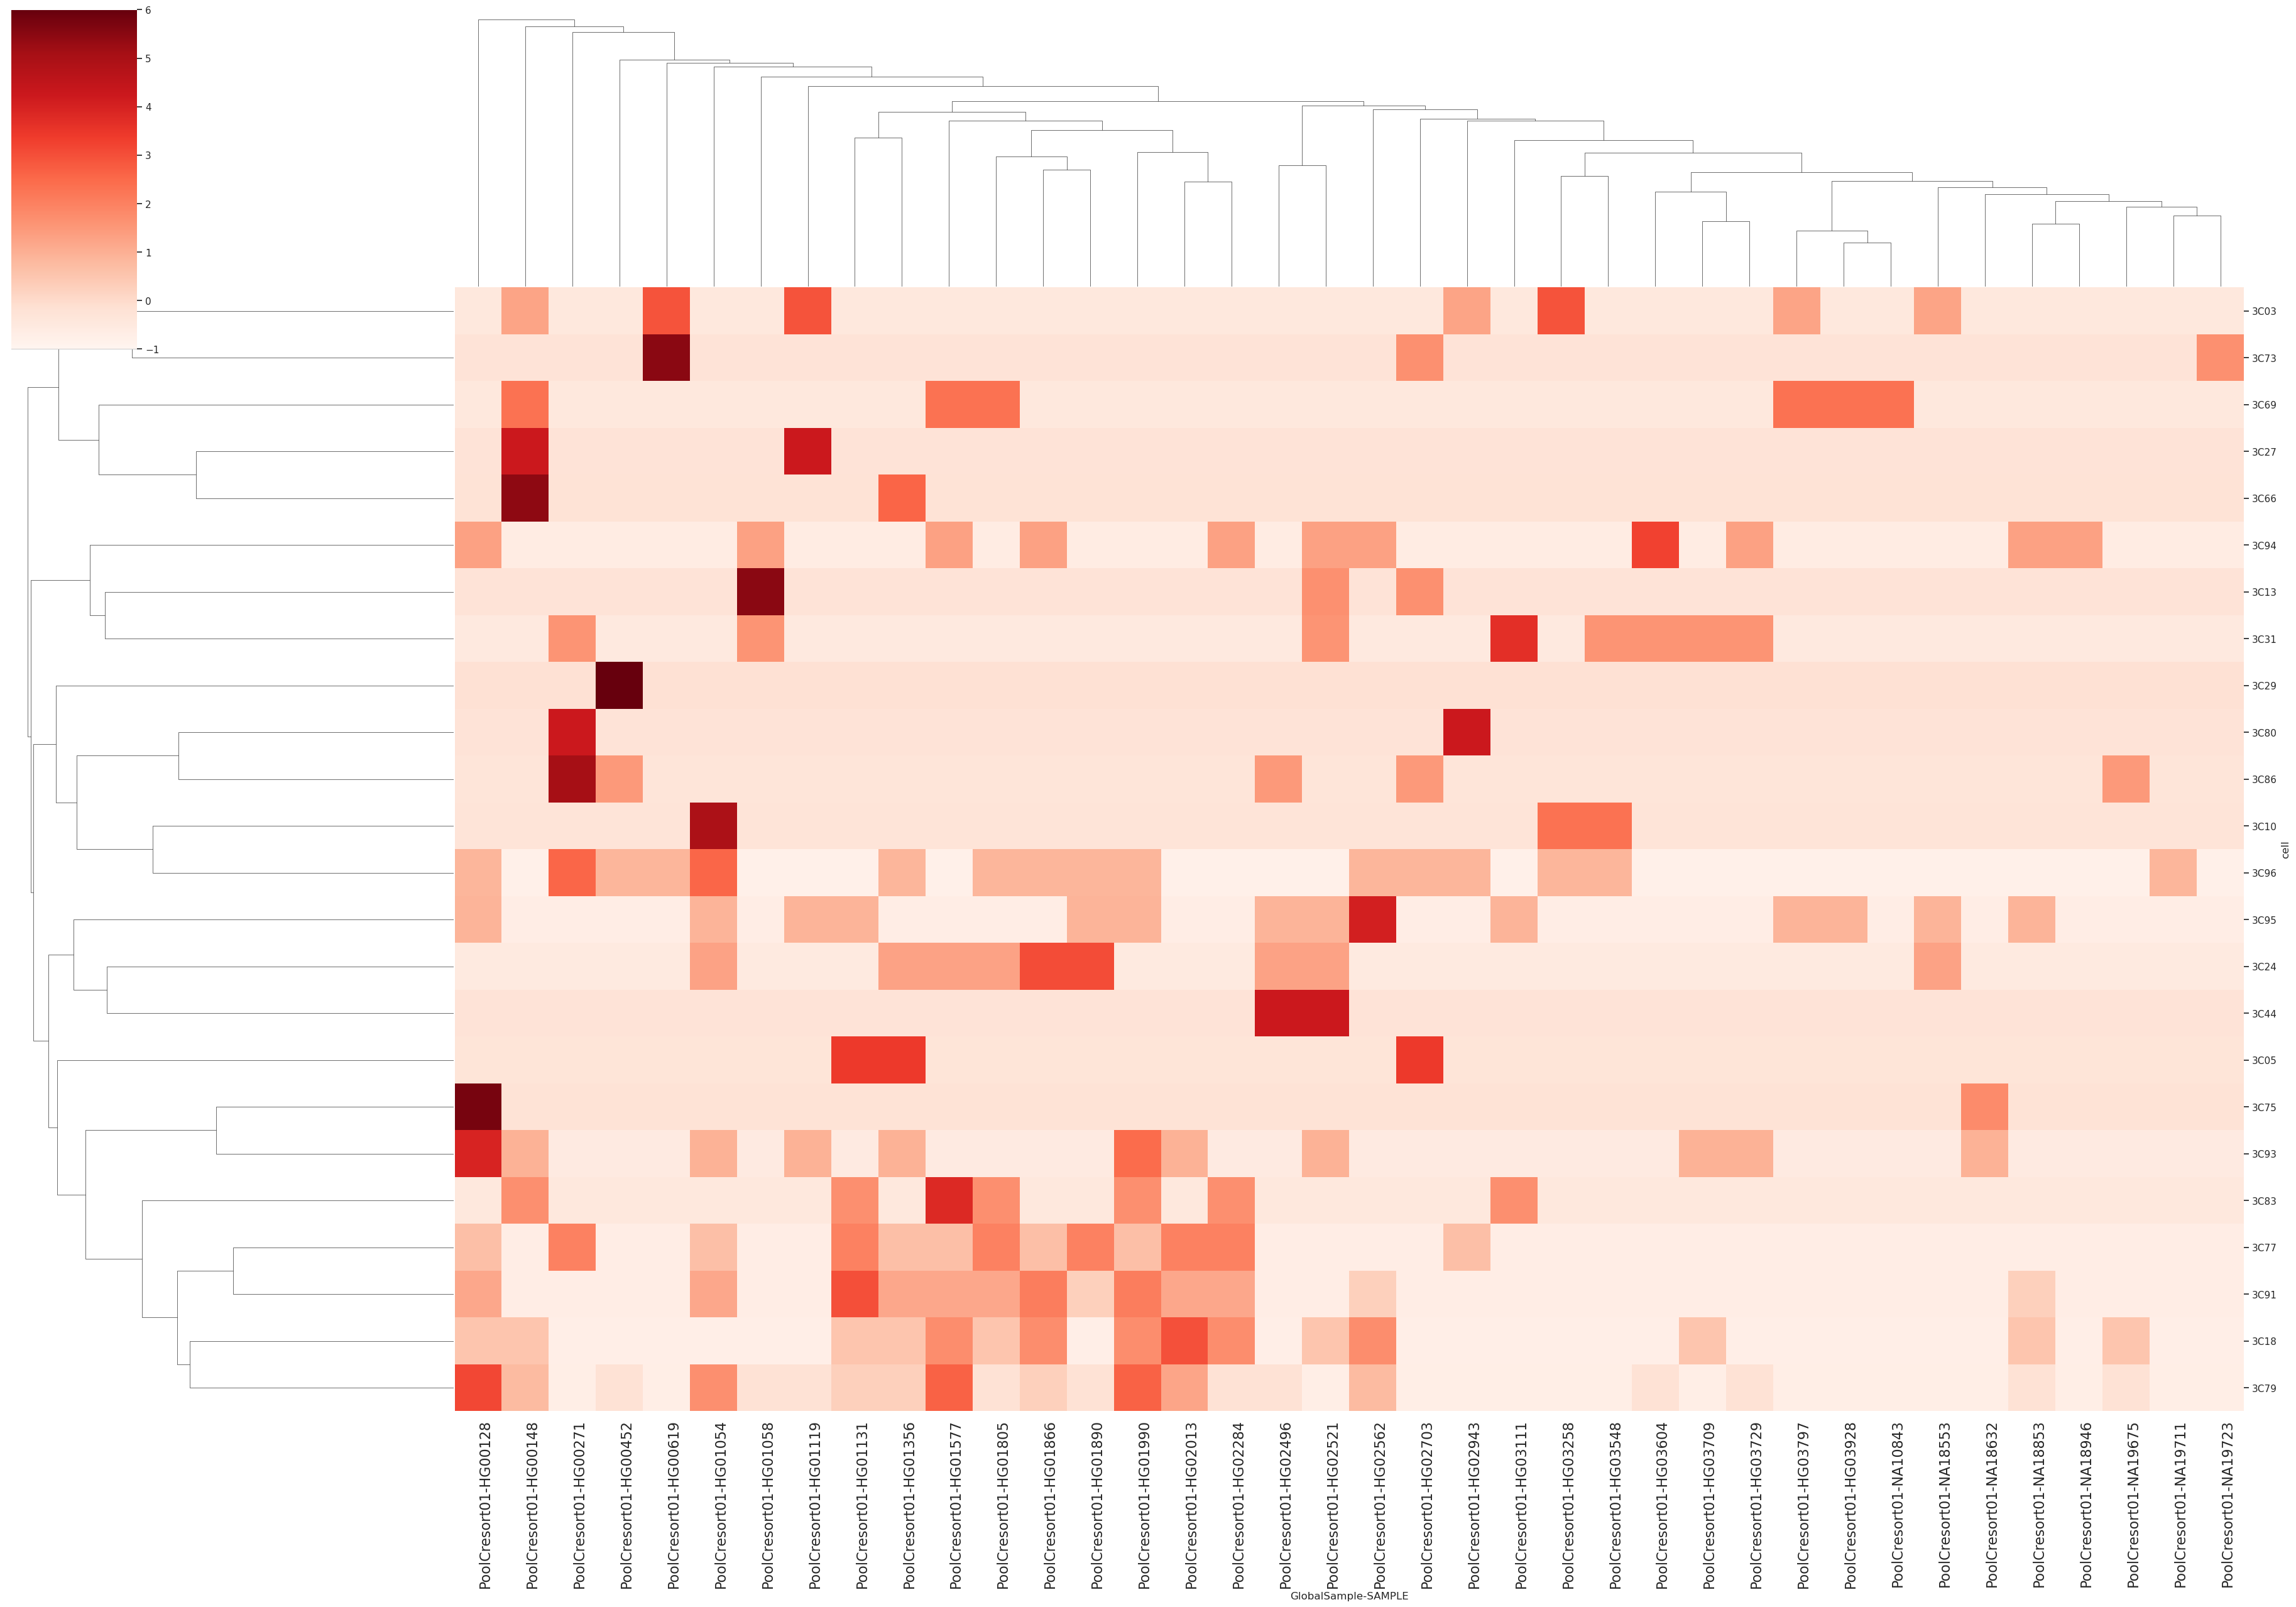

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data

# Create the clustermap
ax = sns.clustermap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)

# Set the size of the figure
width, height = 40, 30  # You can adjust these values as needed
ax.fig.set_size_inches(width, height)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor", fontsize=10)  # Adjust fontsize as needed

# Get the number of labels (assuming they are the same as the number of columns in your data)
num_labels = pivot_table_stats_zscore.shape[1]

# Set the x-tick labels manually
ax.ax_heatmap.set_xticks([x+0.5 for x in range(num_labels)])
ax.ax_heatmap.set_xticklabels(["-".join(e) for e in pivot_table_stats_zscore.columns], rotation=90,  ha='right', rotation_mode='anchor', fontsize=16 )
print(ax.ax_heatmap.get_xticklabels())

# Save the figure
output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
#ax.savefig(output_file)

#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/clustermap_zscore_cell_per_sample.png")
ax

In [34]:
pivot_table_stats_zscore_no_mi =  pivot_table_stats_zscore.copy()
pivot_table_stats_zscore_no_mi.columns = ["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
pivot_table_stats_zscore_no_mi

,PoolCresort01-HG00128,PoolCresort01-HG00148,PoolCresort01-HG00271,PoolCresort01-HG00452,PoolCresort01-HG00619,PoolCresort01-HG01054,PoolCresort01-HG01058,PoolCresort01-HG01119,PoolCresort01-HG01131,PoolCresort01-HG01356,PoolCresort01-HG01577,PoolCresort01-HG01805,PoolCresort01-HG01866,PoolCresort01-HG01890,PoolCresort01-HG01990,PoolCresort01-HG02013,PoolCresort01-HG02284,PoolCresort01-HG02496,PoolCresort01-HG02521,PoolCresort01-HG02562,PoolCresort01-HG02703,PoolCresort01-HG02943,PoolCresort01-HG03111,PoolCresort01-HG03258,PoolCresort01-HG03548,PoolCresort01-HG03604,PoolCresort01-HG03709,PoolCresort01-HG03729,PoolCresort01-HG03797,PoolCresort01-HG03928,PoolCresort01-NA10843,PoolCresort01-NA18553,PoolCresort01-NA18632,PoolCresort01-NA18853,PoolCresort01-NA18946,PoolCresort01-NA19675,PoolCresort01-NA19711,PoolCresort01-NA19723
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3C03,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,1.242299,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678
3C05,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
3C10,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,4.944980,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721
3C13,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,5.498323,-0.252217,-0.252217,-0.252217
3C18,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,1.742843,2.969287,-0.710047,1.742843,0.516398,0.516398,0.516398,1.742843,0.516398,0.516398,-0.710047,1.742843,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,1.742843,-0.710047
3C24,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,1.274209,-0.519122,-0.519122,-0.519122,1.274209,1.274209,-0.519122,-0.519122,3.067540,-0.519122,3.067540,-0.519122,-0.519122,-0.519122,-0.519122,1.274209,-0.519122,1.274209,1.274209,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,-0.519122,1.274209,-0.519122,-0.519122,-0.519122,-0.519122
3C27,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,4.242641,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,4.242641,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702,-0.235702
3C29,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,6.082763,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399,-0.164399
3C31,1.579731,-0.490261,-0.490261,-0.490261,-0.490261,-0.490261,3.649723,-0.490261,

In [35]:
melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

In [36]:
if index:
    combine_ashleys_mc_stats["cell"] = combine_ashleys_mc_stats["cell"].apply(lambda r: r.split(index)[1])
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample_x,sample_y,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,3C01,0,0.0000,PoolCresort01,PoolCresort01,0,9527,29,8492,525,264,217,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
1,3C02,0,0.1057,PoolCresort01,PoolCresort01,2,929429,304,804028,34856,44914,45327,0,0.000000,0.00000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
2,3C03,1,0.9365,PoolCresort01,PoolCresort01,7,2788279,1427,2441229,118417,112879,114327,1,0.377477,4.77351,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
3,3C04,1,0.6644,PoolCresort01,PoolCresort01,3,1695232,551,1511256,54505,64008,64912,1,0.377477,2.71366,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...
4,3C05,1,0.8709,PoolCresort01,PoolCresort01,4,2058999,802,1842820,68933,72798,73646,1,0.377477,3.07940,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-06-19...


In [37]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
1,3C03,PoolCresort01,HG00452,2
2,3C03,PoolCresort01,HG01131,2
3,3C03,PoolCresort01,HG01577,1
4,3C03,PoolCresort01,HG01805,2
5,3C03,PoolCresort01,HG02943,1


In [38]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
1,3C03,PoolCresort01,HG00452,2
2,3C03,PoolCresort01,HG01131,2
3,3C03,PoolCresort01,HG01577,1
4,3C03,PoolCresort01,HG01805,2
5,3C03,PoolCresort01,HG02943,1


In [39]:
predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
predictions_to_export.loc[predictions_to_export["value"] < 5, "Trustable"] = False
predictions_to_export.loc[predictions_to_export["value"] >= 5, "Trustable"] = True
predictions_to_export[["GlobalSample", "SampleID"]] = predictions_to_export["variable"].str.split("-", expand=True)
predictions_to_export = predictions_to_export.rename(columns={"value": "z-score_value", "GlobalSample" : "Pool", "SampleID" : "1KG_identified_sample"}).drop("variable", axis=1)
predictions_to_export = pd.merge(predictions_to_export, gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}), on=["cell", "Pool", "1KG_identified_sample"])
predictions_to_export = predictions_to_export[["cell", "Pool", "1KG_identified_sample", "z-score_value", "SNP_nb", "Trustable"]]
predictions_to_export.to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_lite.xlsx", index=False)
predictions_to_export_lite = predictions_to_export.copy()
predictions_to_export = pd.merge(predictions_to_export, combine_ashleys_mc_stats, on="cell")
# Create tuples for MultiIndex
multiindex_columns = [('demultiplexing predictions', col) if col in predictions_to_export_lite.columns else ('metrics', col) for col in predictions_to_export.columns]
predictions_to_export_merge = predictions_to_export.copy()
# Assign MultiIndex to the columns of the merged DataFrame
predictions_to_export_merge.columns = pd.MultiIndex.from_tuples(multiindex_columns)

predictions_to_export_merge.set_index(("demultiplexing predictions", "cell")).to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_with_metrics.xlsx", index=True)
predictions_to_export_merge

/tmp/ipykernel_1555252/58075166.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)


demultiplexing predictions                                       \
                         cell           Pool 1KG_identified_sample   
0                        3C03  PoolCresort01               HG00452   
1                        3C05  PoolCresort01               HG01866   
2                        3C10  PoolCresort01               HG03258   
3                        3C13  PoolCresort01               NA18946   
4                        3C18  PoolCresort01               HG01990   
5                        3C24  PoolCresort01               HG01890   
6                        3C27  PoolCresort01               HG01131   
7                        3C29  PoolCresort01               HG01119   
8                        3C31  PoolCresort01               HG01058   
9                        3C44  PoolCresort01               HG01054   
10                       3C66  PoolCresort01               HG02943   
11                       3C69  PoolCresort01               HG00148   
12                       3C73  PoolCresort01               HG00452   
13                       3C75  PoolCresort01               HG02496   
14                       3C77  PoolCresort01               HG01990   
15                       3C79  PoolCresort01               HG02496   
16                       3C80  PoolCresort01               HG03709   
17                       3C83  PoolCresort01               HG02703   
18                       3C86  PoolCresort01               NA19723   
19                       3C91  PoolCresort01               HG02562   
20                       3C93  PoolCresort01               HG02496   
21                       3C94  PoolCresort01               HG00128   
22                       3C95  PoolCresort01               HG02284   
23                       3C96  PoolCresort01               HG03258   

                                     metrics                             \
   z-score_value SNP_nb Trustable prediction probability       sample_x   
0       2.928276      2     False          1      0.9365  PoolCresort01   
1       3.415650      1     False          1      0.8709  PoolCresort01   
2       4.944980      2     False          1      0.9571  PoolCresort01   
3       5.498323      3      True          1      0.8472  PoolCresort01   
4       2.969287      3     False          1      0.7777  PoolCresort01   
5       3.067540      2     False          1      0.8591  PoolCresort01   
6       4.242641      1     False          1      0.8480  PoolCresort01   
7       6.082763      1      True          1      0.7430  PoolCresort01   
8       3.649723      2     False          1      0.9426  PoolCresort01   
9       4.242641      1     False          1      0.7672  PoolCresort01   
10      5.426047      2      True          1      0.6037  PoolCresort01   
11      2.309401      1     False          1      0.6850  PoolCresort01   
12      5.498323      3      True          1      0.9260  PoolCresort01   
13      5.765567      3      True          1      0.8509  PoolCresort01   
14      1.994178      2     False          1      0.9611  PoolCresort01   
15      3.135798      8     False          1      0.8958  PoolCresort01   
16      4.242641      1     False          1      0.9634  PoolCresort01   
17      3.825299      2     False          1      0.9173  PoolCresort01   
18      5.072286      3      True          1      0.8561  PoolCresort01   
19      2.995785      4     False          1      0.8892  PoolCresort01   
20      3.952847      3     False          1      0.9473  PoolCresort01   
21      3.249108      2     False          1      0.9593  PoolCresort01   
22      4.069229      3     False          1      0.9477  PoolCresort01   
23      2.563262      2     False          1      0.5584  PoolCresort01   

                                                                          \
         sample_y medbin   mapped suppl     dupl    mapq   read2    good   
0   PoolCresort01      7  2788279  1427  2441229  118417  112879  114327   
1  

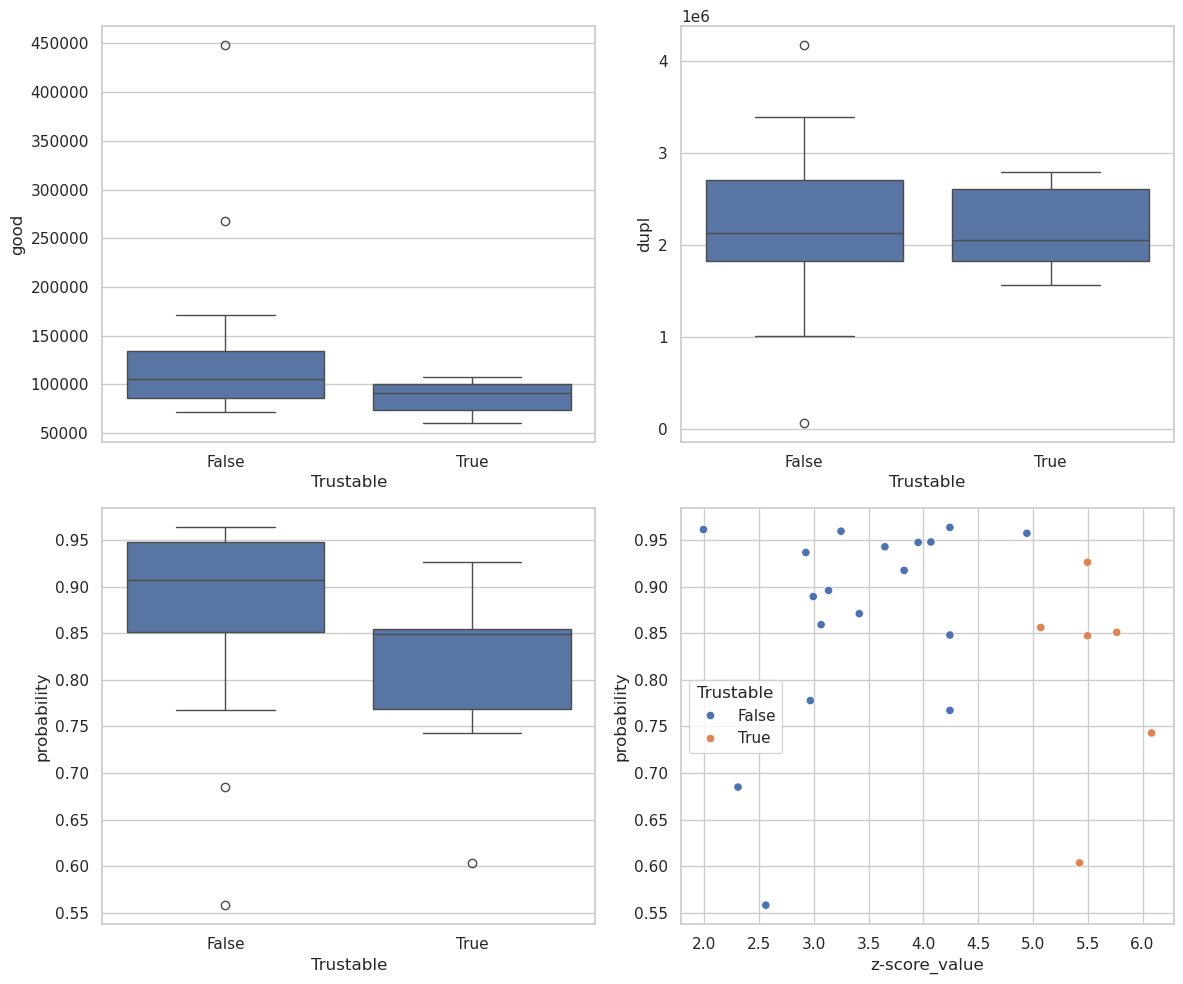

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting
sns.boxplot(data=predictions_to_export, x="Trustable", y="good", ax=axs[0, 0])
sns.boxplot(data=predictions_to_export, x="Trustable", y="dupl", ax=axs[0, 1])
sns.boxplot(data=predictions_to_export, x="Trustable", y="probability", ax=axs[1, 0])
sns.scatterplot(data=predictions_to_export, x="z-score_value", y="probability", hue="Trustable", ax=axs[1, 1])

# Adjust layout for better presentation
plt.tight_layout()

# Save the figure
plt.savefig(f"{output_dir}/{sample_for_savedir}/combined_plots_with_metrics.png")

# Show the plot
plt.show()


In [41]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [42]:
#color_dict

/tmp/ipykernel_1555252/588744856.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
/tmp/ipykernel_1555252/588744856.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90, fontsize=2)


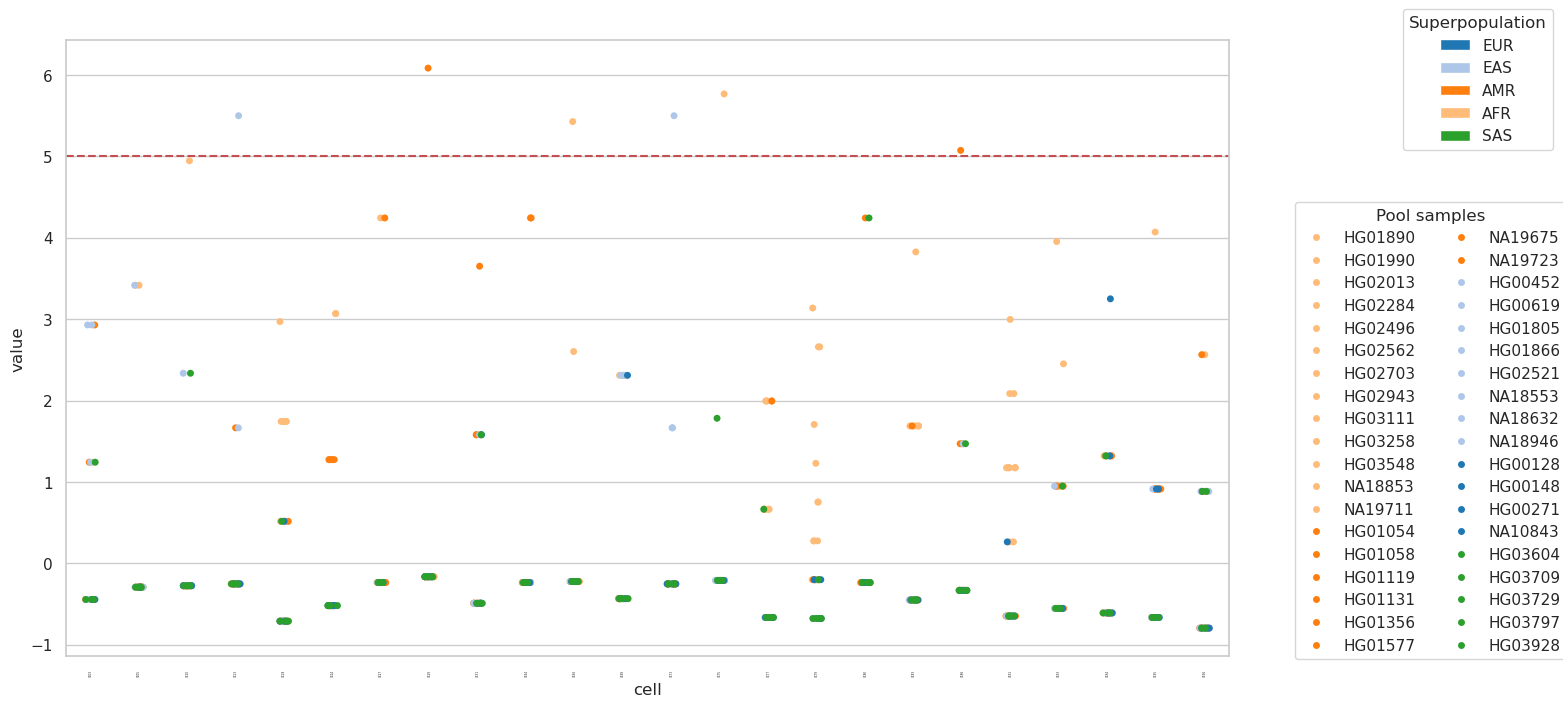

In [43]:
from matplotlib.patches import Patch


melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")]
melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
# Assuming melt_pivot_table_stats_zscore is already defined and has the 'value' column.

# Calculate the numbers
total_points = len(melt_pivot_table_stats_zscore)
points_above_5 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 5) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_6 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 6) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_4 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 4) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
#melt_pivot_table_stats_zscore["variable"] = melt_pivot_table_stats_zscore["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")



melt_pivot_table_stats_zscore_tmp["SampleID"] = melt_pivot_table_stats_zscore_tmp["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")

melt_pivot_table_stats_zscore_tmp = pd.merge(melt_pivot_table_stats_zscore_tmp, metadata[["SampleID", "Superpopulation"]], on="SampleID")
# Generate a list of colors
colors = plt.cm.tab20.colors[:len(metadata.Superpopulation.unique().tolist())]

unique_superpopulations = melt_pivot_table_stats_zscore_tmp['Superpopulation'].unique()

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
melt_pivot_table_stats_zscore_tmp['color'] = melt_pivot_table_stats_zscore_tmp['Superpopulation'].map(color_dict)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore_tmp.sort_values(by=["Superpopulation", "SampleID"])

palette_tmp = melt_pivot_table_stats_zscore_tmp[["SampleID", "color"]].drop_duplicates().set_index('SampleID')["color"].to_dict()


# Plotting
plt.figure(figsize=(15,8))
ax = sns.stripplot(data=melt_pivot_table_stats_zscore_tmp, x="cell", y="value", hue="SampleID", palette=palette_tmp)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90, fontsize=2)
plt.axhline(5, ls="--", lw=1.5, color="r")

# Add text box for the summary
textstr = '\n'.join((
    f'Total : {total_points}',
    f' > 4: {points_above_4}',
    f' > 5: {points_above_5}',
    f' > 6: {points_above_6}'))
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
#ax.text(0.5, 0.6, textstr, transform=ax.transAxes, fontsize=18,
#        verticalalignment='top', bbox=props)


# Create legend handles for superpopulations
#superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
#superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.add_artist(superpop_legend)

# Get handles and labels for SampleID
#handles, labels = ax.get_legend_handles_labels()

# Assuming there's a large number of labels, you might want to limit or organize these differently
# Here's a basic approach to re-adding the SampleID legend
# This step could be customized based on the number of samples and desired appearance
#sample_legend = ax.legend(handles[:len(unique_superpopulations)], labels[:len(unique_superpopulations)], title="SampleID", bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)


# Create legend handles for superpopulations
#legend_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]

# First legend for SampleID - this is automatically added by seaborn, so we get it and set again
#h, l = ax.get_legend_handles_labels()
#first_legend = ax.legend(h, l, bbox_to_anchor=(1.025, 1), loc='upper left', ncol=3, title="Sample")
#plt.gca().add_artist(first_legend)
#
## Second legend for superpopulations
#ax.legend(handles=legend_handles, bbox_to_anchor=(1.025, 0.5), loc='center left', title="Superpopulation")


#ax.set_ylim(2,6.3)
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/zscore_distribution.png")

# Step 1: Manually obtain handles and labels for the "Pool samples"
handles, labels = ax.get_legend_handles_labels()

# Step 2: Create the first legend for "Pool samples"
sample_legend = ax.legend(handles, labels, bbox_to_anchor=(1.05, 0.75), loc='upper left', ncol=2, title="Pool samples")

# Important: Add this first legend back as an artist to the axes
plt.gca().add_artist(sample_legend)

# Step 3: Create the second legend for "Superpopulation"
superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.15, 1.05), loc='upper left', borderaxespad=0.)

#plt.tight_layout()
plt.show()



In [44]:
mask = [col for col in pivot_table_stats_zscore.columns if col[0] != 'Random_for_sanity_check']

# Apply the mask to filter out unwanted columns
pivot_table_stats_zscore[mask].head()

GlobalSample PoolCresort01                                                    \
SAMPLE             HG00128   HG00148   HG00271   HG00452   HG00619   HG01054   
cell                                                                           
3C03             -0.443678 -0.443678 -0.443678  2.928276 -0.443678 -0.443678   
3C05             -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10             -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13             -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18             -0.710047 -0.710047  0.516398 -0.710047 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         HG01058   HG01119   HG01131   HG01356   HG01577   HG01805   
cell                                                                       
3C03         -0.443678 -0.443678  2.928276 -0.443678  1.242299  2.928276   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  2.335130   
3C13         -0.252217 -0.252217 -0.252217  1.664630 -0.252217 -0.252217   
3C18         -0.710047 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         HG01866   HG01890   HG01990   HG02013   HG02284   HG02496   
cell                                                                       
3C03         -0.443678 -0.443678 -0.443678 -0.443678 -0.443678 -0.443678   
3C05          3.415650 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13          1.664630 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18         -0.710047  1.742843  2.969287 -0.710047  1.742843  0.516398   

GlobalSample                                                              \
SAMPLE         HG02521   HG02562   HG02703   HG02943   HG03111   HG03258   
cell                                                                       
3C03         -0.443678 -0.443678 -0.443678  1.242299 -0.443678 -0.443678   
3C05         -0.292770  3.415650 -0.292770 -0.292770  3.415650 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  4.944980   
3C13         -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18          0.516398  0.516398  1.742843  0.516398  0.516398 -0.710047   

GlobalSample                                                              \
SAMPLE         HG03548   HG03604   HG03709   HG03729   HG03797   HG03928   
cell                                                                       
3C03         -0.443678 -0.443678  1.242299 -0.443678 -0.443678 -0.443678   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721  2.335130   
3C13         -0.252217 -0.252217 -0.252217 -0.252217 -0.252217 -0.252217   
3C18          1.742843 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                                                              \
SAMPLE         NA10843   NA18553   NA18632   NA18853   NA18946   NA19675   
cell                                                                       
3C03         -0.443678 -0.443678  1.242299 -0.443678 -0.443678 -0.443678   
3C05         -0.292770 -0.292770 -0.292770 -0.292770 -0.292770 -0.292770   
3C10         -0.274721 -0.274721 -0.274721 -0.274721 -0.274721 -0.274721   
3C13         -0.252217 -0.252217 -0.252217 -0.252217  5.498323 -0.252217   
3C18         -0.710047 -0.710047 -0.710047  0.516398 -0.710047 -0.710047   

GlobalSample                      
SAMPLE         NA19711   NA19723  
cell                              
3C03         -0.443678 -0.443678  
3C05         -0.292770 -0.292770  
3C10         -0.274721 -0.274721  
3C13         -0.252217 -0.252217  
3C18          1.742843 -0.710047

In [45]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore[mask].copy()
pivot_table_stats_zscore_wt_multiindex.columns = pivot_table_stats_zscore[mask].columns.droplevel()
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.reset_index().rename({"index":"cell"}, axis=1)
pivot_table_stats_zscore_wt_multiindex.head()                   

SAMPLE,cell,HG00128,HG00148,HG00271,HG00452,HG00619,HG01054,HG01058,HG01119,HG01131,HG01356,HG01577,HG01805,HG01866,HG01890,HG01990,HG02013,HG02284,HG02496,HG02521,HG02562,HG02703,HG02943,HG03111,HG03258,HG03548,HG03604,HG03709,HG03729,HG03797,HG03928,NA10843,NA18553,NA18632,NA18853,NA18946,NA19675,NA19711,NA19723
0,3C03,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,1.242299,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678
1,3C05,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
2,3C10,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,4.944980,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721
3,3C13,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,5.498323,-0.252217,-0.252217,-0.252217
4,3C18,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,1.742843,2.969287,-0.710047,1.742843,0.516398,0.516398,0.516398,1.742843,0.516398,0.516398,-0.710047,1.742843,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,1.742843,-0.710047


In [46]:
#pivot_table_stats_zscore.melt()
melt_df = pd.melt(pivot_table_stats_zscore_wt_multiindex, id_vars=['cell'], value_vars=[e for e in pivot_table_stats_zscore_wt_multiindex.columns if e not in ["cell"]])
melt_df.head()

,cell,SAMPLE,value
0,3C03,HG00128,-0.443678
1,3C05,HG00128,-0.292770
2,3C10,HG00128,-0.274721
3,3C13,HG00128,-0.252217
4,3C18,HG00128,-0.710047


In [47]:
def top_n_samples(group, n=3):
    return group.sort_values(by='ID', ascending=False).head(n)


# tmp_debug = gb_sample_count_stats.loc[(gb_sample_count_stats["sample"] == "GM19836x01") & (gb_sample_count_stats["prediction"] == 1)].sort_values(by=["cell", "ID"], ascending=[True, False])
pd.options.display.max_rows = None
gb_sample_count_stats
tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)
tmp_debug = pd.merge(tmp_debug, melt_df, on=["cell", "SAMPLE"], how="inner")
tmp_debug[["cell", "SAMPLE", "ID", "value", "probability", "good"]]
tmp_debug.head(100)
tmp_debug.to_excel(f"{output_dir}/{sample_for_savedir}/debug.xlsx", index=False)

# # Generate a color for each unique cell
# unique_cells = tmp_debug['cell'].unique()
# colors = [f"background-color: rgb({200 + i*20 % 55}, {220 - (i*20) % 55}, {200 + (i*30) % 55})" for i in range(len(unique_cells))]
# color_map = dict(zip(unique_cells, colors))

# # Apply the colors
# def apply_row_colors(row):
#     return [color_map[row['cell']]] * len(row)

# styled_df = tmp_debug.drop(["bam"], axis=1).style.apply(apply_row_colors, axis=1)

# # Display the styled DataFrame in Jupyter Notebook
# styled_df


/tmp/ipykernel_1555252/2913691368.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)


In [48]:
tmp_debug.SAMPLE.nunique()

29

In [49]:

# Rpy2

%load_ext rpy2.ipython 


In [50]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [51]:
#melt_pivot_table_stats_zscore

In [52]:
melt_pivot_table_stats_zscore.head()
melt_pivot_table_stats_zscore[["GlobalSample", "SampleID"]] = melt_pivot_table_stats_zscore.variable.str.split("-", expand=True)
melt_pivot_table_stats_zscore.head()

,cell,variable,value,GlobalSample,SampleID
0,3C03,PoolCresort01-HG00452,2.928276,PoolCresort01,HG00452
1,3C05,PoolCresort01-HG01866,3.415650,PoolCresort01,HG01866
2,3C10,PoolCresort01-HG03258,4.944980,PoolCresort01,HG03258
3,3C13,PoolCresort01-NA18946,5.498323,PoolCresort01,NA18946
4,3C18,PoolCresort01-HG01990,2.969287,PoolCresort01,HG01990


In [53]:
merge_melt_pivot_table_stats_zscore = pd.merge(melt_pivot_table_stats_zscore, metadata, on="SampleID")
merge_melt_pivot_table_stats_zscore.head()


,cell,variable,value,GlobalSample,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,3C03,PoolCresort01-HG00452,2.928276,PoolCresort01,HG00452,SH017,0,0,2,CHS,EAS
1,3C05,PoolCresort01-HG01866,3.415650,PoolCresort01,HG01866,VN033,0,0,1,KHV,EAS
2,3C10,PoolCresort01-HG03258,4.944980,PoolCresort01,HG03258,GB120,0,0,1,GWD,AFR
3,3C13,PoolCresort01-NA18946,5.498323,PoolCresort01,NA18946,NA18946,0,0,2,JPT,EAS
4,3C18,PoolCresort01-HG01990,2.969287,PoolCresort01,HG01990,BB12,0,0,1,ACB,AFR


In [54]:
merge_melt_pivot_table_stats_zscore.SampleID.nunique()

19

In [55]:
import yaml
import re 
file_path = "pools_composition.yaml"
reference_sample_list_raw = yaml.safe_load(open(file_path, "r"))
import string
reference_sample_list = dict()
for k,v in reference_sample_list_raw.items():
    # extract the pool name with the number
    print(k)
    reference_sample_list[k.lower()] = v
    # modify the regex to capture the number after "Pool"
    nb = re.search(r"pool(\d+)", k.lower()).group(1)
    print(nb)
    if "NEW" in k:
        # corresponding char in the alphabet 
        char = string.ascii_uppercase[int(nb) - 1]
        print(char)
        reference_sample_list[f"pool{char.lower()}"] = v




pool1NEW
1
A
pool2NEW
2
B
pool3NEW
3
C
pool1
1
pool2
2
pool3
3


In [56]:


print(sample.lower())
print(reference_sample_list.keys())
if (not "NEW" in sample) and (re.search(r"pool\d+", sample.lower()) is False):
    corresponding_sample = [e for e in reference_sample_list if e.lower() in sample.lower() and "new" not in e.lower()][0]
else:
    for k in reference_sample_list:
        print(k.lower(), sample.lower())
        if k.lower() in sample.lower():
            corresponding_sample = k
            break
reference_samples_with_metadata = pd.merge(
    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[corresponding_sample]], columns=[corresponding_sample]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
    metadata,
    how='left'
)
reference_samples_with_metadata


poolcresort01
dict_keys(['pool1new', 'poola', 'pool2new', 'poolb', 'pool3new', 'poolc', 'pool1', 'pool2', 'pool3'])
pool1new poolcresort01
poola poolcresort01
pool2new poolcresort01
poolb poolcresort01
pool3new poolcresort01
poolc poolcresort01


,Pool,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,poolc,HG00128,HG00128,0,0,2,GBR,EUR
1,poolc,HG00148,HG00148,0,0,1,GBR,EUR
2,poolc,HG00271,HG00271,0,0,1,FIN,EUR
3,poolc,HG00452,SH017,0,0,2,CHS,EAS
4,poolc,HG00619,SH066,0,0,1,CHS,EAS
5,poolc,HG01054,PR12,0,0,1,PUR,AMR
6,poolc,HG01058,PR13,0,0,2,PUR,AMR
7,poolc,HG01119,CLM01,0,0,2,CLM,AMR
8,poolc,HG01131,CLM06,0,0,2,CLM,AMR
9,poolc,HG01356,CLM31,0,0,1,CLM,AMR


In [57]:
#if (not "NEW" in sample) and (re.search(r"Pool\d+", sample) is False):
#    corresponding_sample = [e for e in reference_sample_list if e.lower() in sample.lower() and "NEW" not in e][0]
#else:
#    
#    corresponding_sample = [e for e in reference_sample_list if e in sample and ("NEW" in e) or (re.search(r"Pool\d+", sample) is False)][0]
#
#print(corresponding_sample)
#reference_samples_with_metadata = pd.merge(
#    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[corresponding_sample]], columns=[corresponding_sample]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
#    metadata,
#    how='left'
#)
#reference_samples_with_metadata.head()

{'HG03797', 'HG00452', 'HG01054', 'NA18632', 'NA19675', 'HG03258', 'HG02943', 'HG02013', 'NA18853', 'NA19711', 'HG02284', 'HG02562', 'HG03709', 'HG01805', 'HG01890', 'HG01577', 'HG01866', 'NA19723', 'HG03604', 'HG00619', 'NA10843', 'HG02521', 'HG02703', 'HG03729', 'NA18946', 'HG00148', 'HG00128', 'HG01356', 'HG03928', 'HG01119', 'HG01131', 'HG01990', 'NA18553', 'HG03111', 'HG01058', 'HG03593', 'HG03548', 'HG02496', 'HG00271'}
{'HG00452', 'HG01054', 'HG03258', 'HG02943', 'HG02284', 'HG02562', 'HG01890', 'NA19723', 'HG01866', 'HG02703', 'NA18946', 'HG00148', 'HG00128', 'HG01119', 'HG01131', 'HG01990', 'HG01058', 'HG02496', 'HG03709'}
{'HG03797', 'NA18632', 'NA19675', 'HG02013', 'NA18853', 'NA19711', 'HG01805', 'HG01577', 'HG03604', 'HG00619', 'NA10843', 'HG02521', 'HG03729', 'HG01356', 'HG03928', 'NA18553', 'HG03111', 'HG03593', 'HG03548', 'HG00271'}


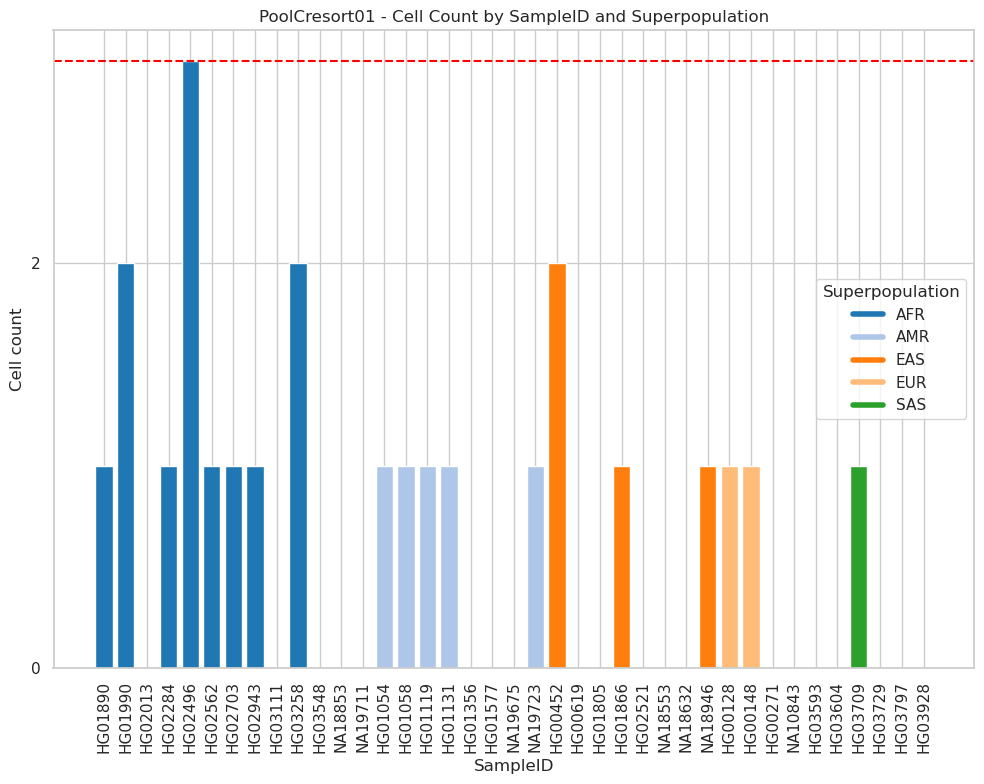

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merge_melt_pivot_table_stats_zscore is a DataFrame that contains the data you've shown.

df = merge_melt_pivot_table_stats_zscore.groupby(["Superpopulation", "SampleID"])["cell"].nunique().reset_index()


# First, find all unique SampleIDs from reference_samples_with_metadata
unique_ref_sample_ids = reference_samples_with_metadata['SampleID'].unique()

# Identify missing SampleIDs in df
missing_sample_ids = set(unique_ref_sample_ids).difference(set(df['SampleID'].unique().tolist()))


print(set(unique_ref_sample_ids))
print(set(df['SampleID'].unique().tolist()))
print(missing_sample_ids)


# For each missing SampleID, find its Superpopulation from reference_samples_with_metadata and add a row to df
for sample_id in missing_sample_ids:
    superpop = reference_samples_with_metadata.loc[reference_samples_with_metadata['SampleID'] == sample_id, 'Superpopulation'].values[0]
    # Add a new row to df for the missing SampleID
    # Assuming 'cell' count should be 0 (or another placeholder value) for missing SampleID
    df = pd.concat([df, pd.DataFrame({'Superpopulation': [superpop], 'SampleID': [sample_id], 'cell': [0]})], ignore_index=True)
    df = df.loc[~df["SampleID"].isin(["HG01453", "HG04128"])]


# Unique superpopulations for color mapping
unique_superpopulations = df['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
df['color'] = df['Superpopulation'].map(color_dict)

df = df.sort_values(by=["Superpopulation", "SampleID"])


df.to_csv(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop_DATA.csv", index=False, sep="\t")

# Plot
plt.figure(figsize=(10, 8))
for _, row in df.iterrows():
    plt.bar(row['SampleID'], row['cell'], color=row['color'], label=row['Superpopulation'])

plt.axhline(3, ls="--", color="red")
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color_dict[sp], lw=4, label=sp) for sp in unique_superpopulations]
plt.legend(handles=legend_elements, title='Superpopulation')

plt.xlabel('SampleID')
plt.ylabel('Cell count')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.title(f'{sample_for_savedir_lite} - Cell Count by SampleID and Superpopulation')

import matplotlib
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().yaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.savefig(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop.png")

plt.show()


/tmp/ipykernel_1555252/3277955254.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')
/tmp/ipykernel_1555252/3277955254.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)


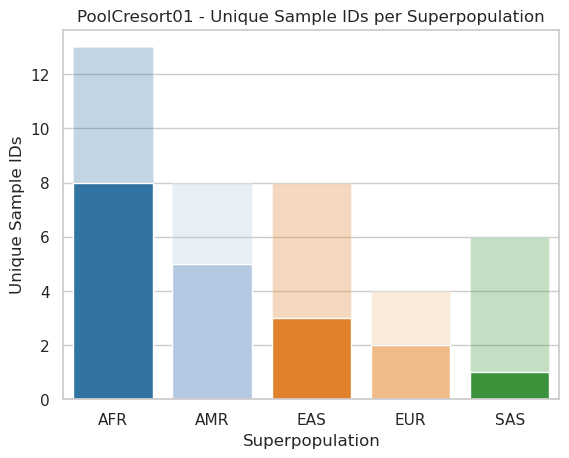

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_melt_pivot_table_stats_zscore is your DataFrame
grouped_data = merge_melt_pivot_table_stats_zscore.groupby("Superpopulation")["SampleID"].nunique().reset_index()

# Unique superpopulations for color mapping
unique_superpopulations = grouped_data['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Create a color palette that Seaborn can use
palette = [color_dict[sp] for sp in grouped_data['Superpopulation']]


# Plot expected counts (background bars)
sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


df.to_csv(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled_DATA_background.csv", index=False, sep="\t")

sample_for_savedir_lite = sample_for_savedir.split("--")[1]
# Plot
sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)

plt.xlabel('Superpopulation')
plt.ylabel('Unique Sample IDs')
plt.title(f'{sample_for_savedir_lite} - Unique Sample IDs per Superpopulation')
plt.savefig(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled.png")

plt.show()


<Axes: xlabel='Population', ylabel='count'>

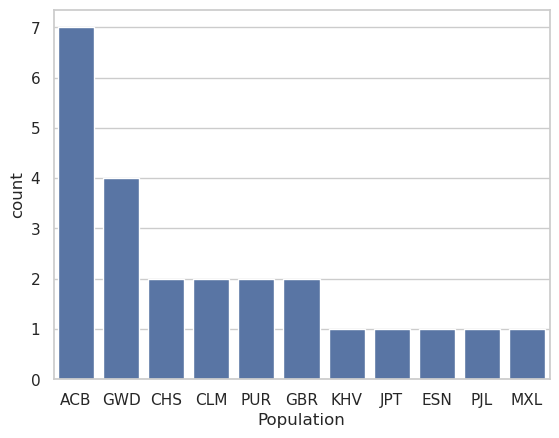

In [60]:
sns.barplot(data=merge_melt_pivot_table_stats_zscore.Population.value_counts().reset_index(), x="Population", y="count")

In [61]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.set_index("cell")
pivot_table_stats_zscore_wt_multiindex.head()

SAMPLE,HG00128,HG00148,HG00271,HG00452,HG00619,HG01054,HG01058,HG01119,HG01131,HG01356,HG01577,HG01805,HG01866,HG01890,HG01990,HG02013,HG02284,HG02496,HG02521,HG02562,HG02703,HG02943,HG03111,HG03258,HG03548,HG03604,HG03709,HG03729,HG03797,HG03928,NA10843,NA18553,NA18632,NA18853,NA18946,NA19675,NA19711,NA19723
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3C03,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,2.928276,-0.443678,1.242299,2.928276,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678,1.242299,-0.443678,-0.443678,-0.443678,-0.443678,-0.443678
3C05,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,3.415650,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770,-0.292770
3C10,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,4.944980,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,2.335130,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721,-0.274721
3C13,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,1.664630,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,-0.252217,5.498323,-0.252217,-0.252217,-0.252217
3C18,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,1.742843,2.969287,-0.710047,1.742843,0.516398,0.516398,0.516398,1.742843,0.516398,0.516398,-0.710047,1.742843,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,-0.710047,-0.710047,-0.710047,0.516398,-0.710047,-0.710047,1.742843,-0.710047


In [62]:
%%R -i output_dir -i sample_for_savedir -i pivot_table_stats_zscore_wt_multiindex -i metadata -i ref_count -w 1800 -h 1500
library(ComplexHeatmap)
library(circlize)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(pivot_table_stats_zscore_wt_multiindex), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(pivot_table_stats_zscore_wt_multiindex), ref_count$SAMPLE), "GlobalSample"]


# Hex color codes provided by you
superpopulation_colors_hex <- c(
  "AFR" = "#3274A1",
  "AMR" = "#E1812C",
  "EAS" = "#EEBB89",
  "EUR" = "#B5C8E1",
  "SAS" = "#3A923A"
)

# Assuming ordered_metadata is your metadata dataframe which has a column 'Superpopulation'

# Check if all superpopulations in your data are covered by the colors defined
if(!all(unique(ordered_metadata$Superpopulation) %in% names(superpopulation_colors_hex))) {
  stop("Not all superpopulations have a defined color")
}

# Create HeatmapAnnotation objects with the new colors
col_annotation <- HeatmapAnnotation(
  df = ordered_metadata[c("Population", "Superpopulation")],
  col = list(
    Superpopulation = superpopulation_colors_hex  # Apply the color mapping
    # Add other annotations if necessary
  ),
  GlobalSample = global_sample_annotation  # Assuming global_sample_annotation is previously defined
)

# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(pivot_table_stats_zscore_wt_multiindex)
#print(head(mat))

file_path <- paste(output_dir, sample_for_savedir, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
png(file_path, width = 1800, height = 1500)

# Creating the heatmap
Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
       row_names_gp = gpar(fontsize = 8)) # Adjust fontsize as needed

#dev.off()

R[write to console]: Loading required package: grid



R[write to console]: ========================================
ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


